<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/Grover_Algorithim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PON TU NOMBRE AQUÍ**

# Práctica 5: algoritmo de Grover

Implementa en Qiskit el algoritmo de Grover para para un número arbitrario de cúbits.

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

In [58]:
import numpy as np
from math import sqrt

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate

# Funciones auxiliares

# Función para simular y mostrar el vector de estado
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    # Usamos el simulador de vector de estado
    # https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

# Funcion para obtener y mostrar la matriz unitaria
def obten_unitaria(qcirc, etiqueta):
    # Usamos el simulador de matriz unitaria
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

In [64]:
def oraculo_inversion(s, n):
    x = QuantumRegister(n, name="|x\\rangle")
    #meas = ClassicalRegister(n, name="Medida")
    qc = QuantumCircuit(x)

    qc.h(range(n))

    #Invertimos los qbits para los que s tenga un bit a 0
    temp = s
    for qbit in range(n):
      bit_meos_significativo = temp&1 #AND bianrio bit a bit
      if(bit_meos_significativo == 0):
        qc.x(qbit)
      temp >>= 1

    if(n == 2):
      qc.cz(0,1)
    elif(n == 3):
      qc.ccz(0,1,2)

    #DesInvertimos los qbits para los que s tenga un bit a 0
    temp = s
    for qbit in range(n):
      bit_meos_significativo = temp&1 #AND bianrio bit a bit
      if(bit_meos_significativo == 0):
        qc.x(qbit)
      temp >>= 1


    qc.save_statevector()
    return qc

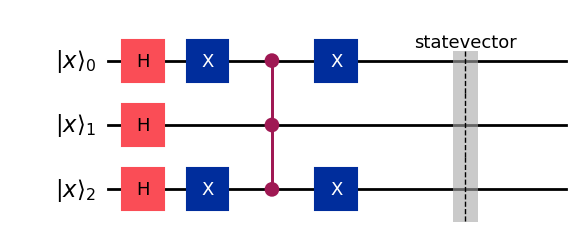

In [65]:
oraculo_inversion(2, 3).draw("mpl")

In [66]:
qc = oraculo_inversion(2, 3)
obten_estado(qc, "|\psi\rangle = ")

<IPython.core.display.Latex object>

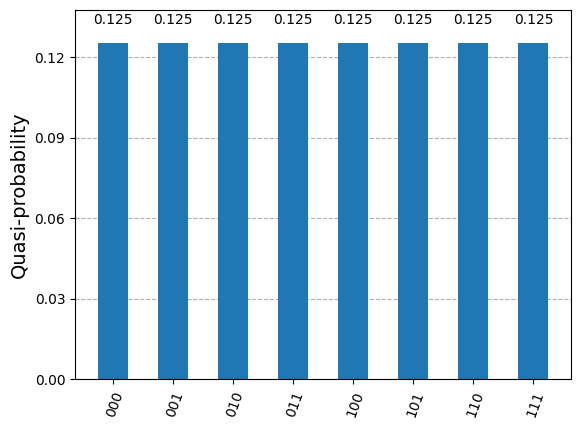

In [67]:
sim = AerSimulator(method='automatic')
qc_obj = transpile(qc, sim)
result = sim.run(qc_obj).result()
estado = result.get_counts()
plot_histogram(estado)

--------------------
-------------------
------------------

In [29]:
def oraculo_amplificacion(n):
    x = QuantumRegister(n, name="|x\\rangle")
    #meas = ClassicalRegister(n, name="Medida")
    qc = QuantumCircuit(x)

    qc.x(range(n))

    if(n == 2):
      qc.cz(0,1)
    elif(n == 3):
      qc.ccz(0,1,2)

    qc.x(range(n))


    qc.save_statevector()
    return qc

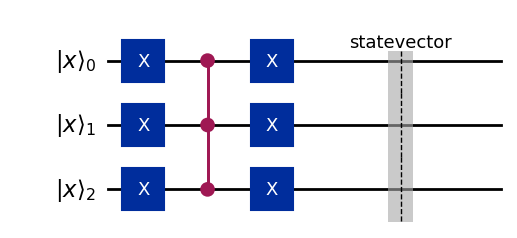

In [31]:
oraculo_amplificacion(3).draw("mpl")

In [ ]:
def grove_algorithim(n,s):
    x = QuantumRegister(n, name="|x\\rangle")
    qc = QuantumCircuit(x)